# Social Justice in Programming

This project investigates the level of equal opportunities in the field of professional developers.<br>
Survey results from Stackoverflow, which are freely accessible at https://insights.stackoverflow.com/survey, are used as the data basis.<br><br>
**Note: The notebook does not claim to fully reflect the complexity of this question. It only elaborates on what the Stackoverflow survey results indicate.*

The questions to be answered in this notebook are: 
- Q1 To what extent is there equal opportunity in the programming profession? <br> 
<br><br>
- Q2 How much does your social environment influence your chances of being successful as a developer? <br>
<br><br>
- Can we see any development in the area of social justice? <br>
Interesting columns: Parents Education, Race, Origin, Salary, JobSatisfaction, CareerSatisfaction > different years
<br><br>
- Q3 How important is an open mind and tolerance to succeed as a programmer? <br>
<br><br>
- How well can the salary be predicted on the basis of the starting conditions?
<br><br><br>
To answer these questions, the first step is to analyze the data base in an exploratory manner.


In [1]:
# necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Let's get a feel for the data set

In [2]:
# read in the data
df = pd.read_csv("2017survey_results_public.csv")
schema = pd.read_csv("2017survey_results_schema.csv")
schema.set_index("Column", inplace=True)

In [3]:
# size of the dataset
print("shape of the data:", df.shape)
print(f"Survey participants: {df.shape[0]}, Questions asked: {df.shape[1]}\n")

# data types
print(f"df.info:")
print({df.info()})

pd.set_option('display.max_columns', 200)
df.head()

shape of the data: (51392, 154)
Survey participants: 51392, Questions asked: 154

df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB
{None}


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

The most interesting columns in regard to the questions are
<br><br><br>
>Q1:
- **Initial conditons:** Race, HighestEducationParents, Gender
- **Partially influenceable conditions:** Country
<br><br>
>Q2:
- **Social environment:** HighestEducationParents, FriendsDevelopers
<br><br>
>Q3:
- **Mindset:** RightWrongWay, LearningNewTech, DiversityImportant
<br><br><br>
To evaluate whether a developer is successful, the following parameters are evaluated:
- **Evaluation parameters:** JobSatisfaction, CareerSatisfaction, Salary
<br><br>
Of course, these evaluation criteria must take into account whether the survey participant is a professional programmer. <br> 
We should also take into account how long the person has been working in the profession, as it is known that the salary increases with experience.
- **Additional parameters:** YearsProgram, Professional


In [4]:
INITIAL_CONDITIONS = ["Race", "HighestEducationParents", "Gender"]
PART_INFLUENCEABLE_CONDITIONS = ["Country"]
SOCIAL_ENVIRONMENT = ["HighestEducationParents", "FriendsDevelopers"]
MINDSET = ["RightWrongWay", "LearningNewTech", "DiversityImportant"]
EVALUATION_PARAMETERS = ["JobSatisfaction", "CareerSatisfaction", "Salary"]
ADDITIONAL_PARAMETERS = ["YearsProgram", "Professional"]

columns_of_interest = list(set([item for list in [INITIAL_CONDITIONS, PART_INFLUENCEABLE_CONDITIONS, SOCIAL_ENVIRONMENT, 
                                                  MINDSET, ADDITIONAL_PARAMETERS, EVALUATION_PARAMETERS] for item in list]))


In [5]:
for index, row in schema.loc[columns_of_interest].iterrows():
    question = schema.loc[index, "Question"]
    print(f"{index}: {question}")

Salary: What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?
RightWrongWay: There's a right and a wrong way to do everything
HighestEducationParents: What is the highest level of education received by either of your parents?
FriendsDevelopers: Most of my friends are developers, engineers, or scientists
Gender: Which of the following do you currently identify as?
Professional: Which of the following best describes you?
Country: In which country do you currently live?
LearningNewTech: Learning new technologies is fun
JobSatisfaction: Job satisfaction rating
CareerSatisfaction: Career satisfaction rating
YearsProgram: How long has it been since you first learned how to program?
Race: Which of the following do you identify as?
DiversityImportant: Diversity in the workplace is important


In [6]:
df_filtered = df[columns_of_interest].copy()
df_filtered.head()

,Salary,RightWrongWay,HighestEducationParents,FriendsDevelopers,Gender,Professional,Country,LearningNewTech,JobSatisfaction,CareerSatisfaction,YearsProgram,Race,DiversityImportant
0,NaN,Somewhat agree,High school,Disagree,Male,Student,United States,Agree,NaN,NaN,2 to 3 years,White or of European descent,Agree
1,NaN,NaN,A master's degree,NaN,Male,Student,United Kingdom,NaN,NaN,NaN,9 to 10 years,White or of European descent,NaN
2,113750.0,Disagree,A professional degree,Somewhat agree,Male,Professional developer,United Kingdom,Strongly agree,9.0,8.0,20 or more years,White or of European descent,Strongly agree
3,NaN,Somewhat agree,A doctoral degree,Agree,Male,Professional non-developer who sometimes write...,United States,Strongly agree,3.0,6.0,14 to 15 years,White or of European descent,Agree
4,NaN,NaN,NaN,NaN,NaN,Professional developer,Switzerland,NaN,8.0,6.0,20 or more years,NaN,NaN


In [7]:
# datatypes in the dataset
df_filtered.dtypes

Salary                     float64
RightWrongWay               object
HighestEducationParents     object
FriendsDevelopers           object
Gender                      object
Professional                object
Country                     object
LearningNewTech             object
JobSatisfaction            float64
CareerSatisfaction         float64
YearsProgram                object
Race                        object
DiversityImportant          object
dtype: object

In [8]:
# ditribution of the quantitative parameters
df_filtered.describe()

,Salary,JobSatisfaction,CareerSatisfaction
count,12891.000000,40376.000000,42695.000000
mean,56298.480641,6.957078,7.300574
std,39880.905277,2.167652,1.955444
min,0.000000,0.000000,0.000000
25%,26440.371839,6.000000,6.000000
50%,50000.000000,7.000000,8.000000
75%,80000.000000,8.000000,9.000000
max,197000.000000,10.000000,10.000000


In [9]:
# proportions of missing evaluation parameters
prop_missing_salary = df_filtered["Salary"].isnull().mean()
prop_missing_jobsf = df_filtered["JobSatisfaction"].isnull().mean()
prop_missing_careersf = df_filtered["CareerSatisfaction"].isnull().mean()
print("Missing evaluation parameters")
print(f"Salary: {round(prop_missing_salary*100, 1)} %")
print(f"JobSatisfaction: {round(prop_missing_jobsf*100, 1)} %")
print(f"CareerSatisfaction: {round(prop_missing_careersf*100, 1)} %")

# missing evaluation parameters combined
print("\nData left after removing every row with missing evaluation parameters:")
print(f"{round((df_filtered.dropna(subset=EVALUATION_PARAMETERS, axis=0).shape[0]/df.shape[0])*100, 1)} %, -> {df_filtered.dropna(subset=EVALUATION_PARAMETERS, axis=0).shape[0]}")



Missing evaluation parameters
Salary: 74.9 %
JobSatisfaction: 21.4 %
CareerSatisfaction: 16.9 %

Data left after removing every row with missing evaluation parameters:
25.0 %, -> 12847


In [10]:
df_eval = df_filtered.dropna(subset=EVALUATION_PARAMETERS, axis=0).copy()

In the df df_eval, due to the filtering with the salary, there should be only survey participants whose professional status is professional developer. <br>
This can be easily checked using the "Professional" column.

In [11]:
print(df_eval["Professional"].value_counts())
print(f"shape df_eval: {df_eval.shape}")

Professional developer    12847
Name: Professional, dtype: int64
shape df_eval: (12847, 13)


The df is now filtered so we can take a look at the distribution of the selected parameters in the data set.

In [12]:
# Plot only combinations where there are at least 50 survey participants
ethnicity_counts = df_eval["Race"].value_counts()[df_eval["Race"].value_counts() >=50]
country_counts = df_eval["Country"].value_counts()[df_eval["Country"].value_counts() >=50]

# Plot only combinations where there are at least 15 survey participants
gender_counts = df_eval["Gender"].value_counts()[df_eval["Gender"].value_counts()>15]

White or of European descent                               8685
South Asian                                                 682
Hispanic or Latino/Latina                                   419
East Asian                                                  308
Middle Eastern                                              212
Hispanic or Latino/Latina; White or of European descent     155
Black or of African descent                                 155
I prefer not to say                                         150
I don’t know                                                131
Middle Eastern; White or of European descent                 66
Name: Race, dtype: int64


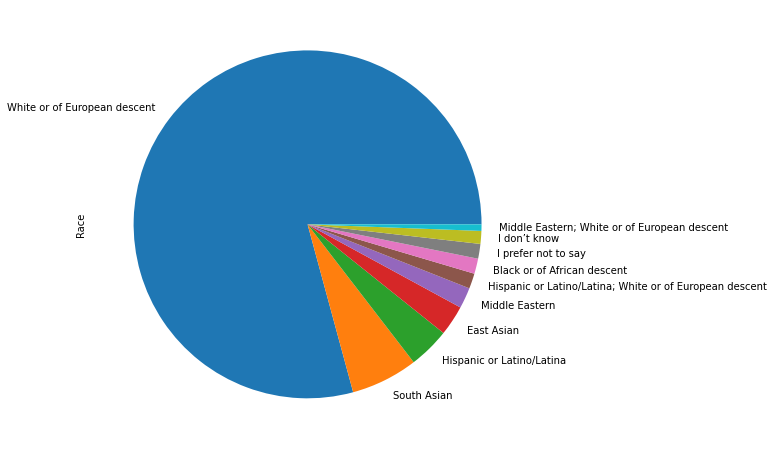

In [13]:
print(ethnicity_counts)
ethnicity_counts.plot(kind="pie", figsize=(8,8));

It is clearly evident that one ethnicity in the chart is clearly overweighted.<br>
Since only ethnicities to which at least 50 survey participants belong are shown here,<br>
it should still be possible to make a reasonably statistically reliable statement with these minorities.<br>
We can neglect the answers 'I prefer not to say' and 'I don't know'. <br>
So we focus on the following groups: <br>
*['White or of European descent', 'South Asian',<br>
'Hispanic or Latino/Latina', 'East Asian', 'Middle Eastern',<br>
'Hispanic or Latino/Latina; White or of European descent',<br>
'Black or of African descent', 'Middle Eastern; White or of European descent']*

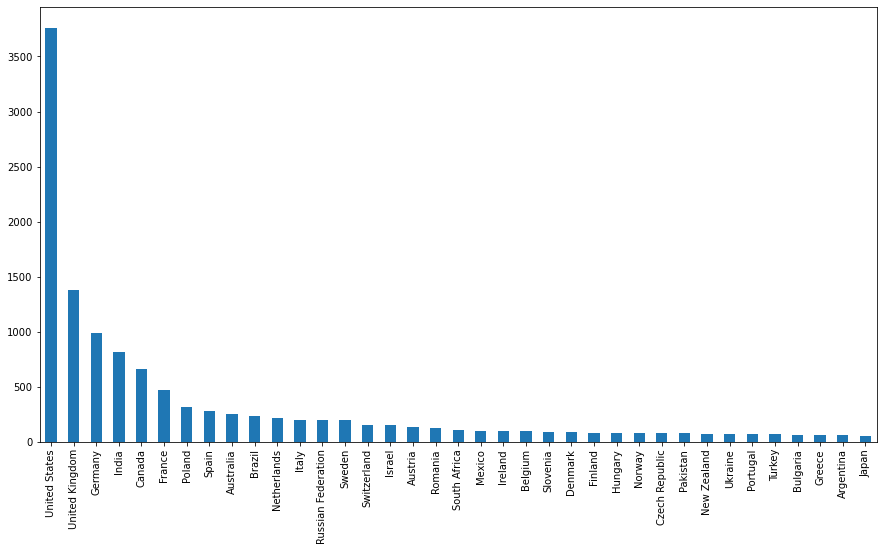

In [14]:
ethnicity_in_focus = ['White or of European descent', 'South Asian',
                      'Hispanic or Latino/Latina', 'East Asian', 'Middle Eastern',
                      'Hispanic or Latino/Latina; White or of European descent',
                      'Black or of African descent', 'Middle Eastern; White or of European descent']

country_counts.plot(kind="bar", figsize=(15,8));

In terms of countries, there is a preponderance toward the U.S., although the data set is much more balanced on this point.

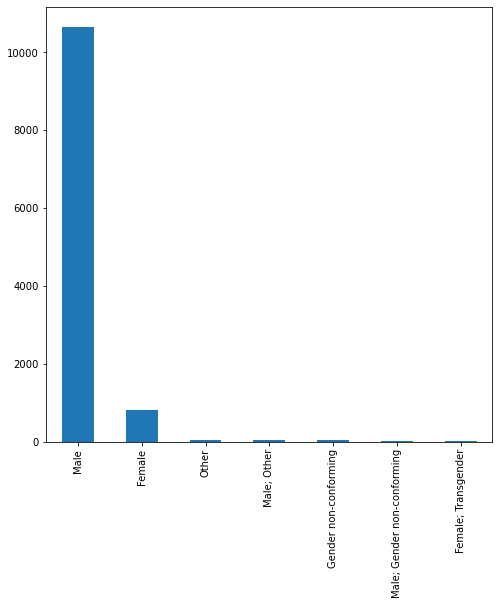

In [15]:
gender_counts.plot(kind="bar", figsize=(8,8));

If you look at the gender distribution, you can see, as you would expect, that the profession of developer is strongly dominated by males. <br>
Since we can't make reasonable statements, with too few survey participants for a gender, we will divide this property into 3 groups. <br>
The first two groups are *female* and *male*. All remaining answers are summarized under the term *Other*.<br>

Male      10632
Female      816
Other       222
Name: Gender, dtype: int64


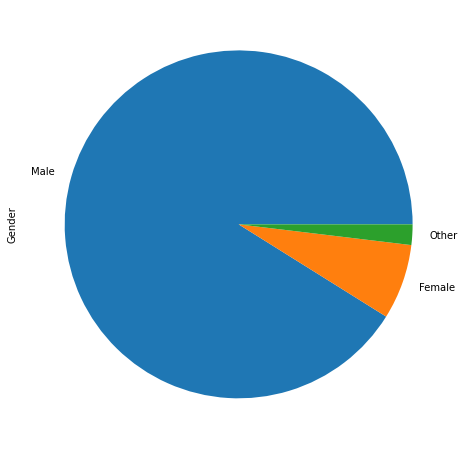

In [27]:
# todo: -> remove?
gender_counts_no_filter = df_eval["Gender"].value_counts()
gender_index_other = [element not in ["Male", "Female"] for element in gender_counts_no_filter.index]


gender_counts_grouped = gender_counts_no_filter[["Male", "Female", "Other"]]
gender_counts_grouped["Other"] = gender_counts_no_filter.iloc[gender_index_other].sum()
print(gender_counts_grouped)
gender_counts_grouped.plot(kind="pie", figsize=(8,8));

Male      10632
Female      816
Other       222
Name: Gender, dtype: int64


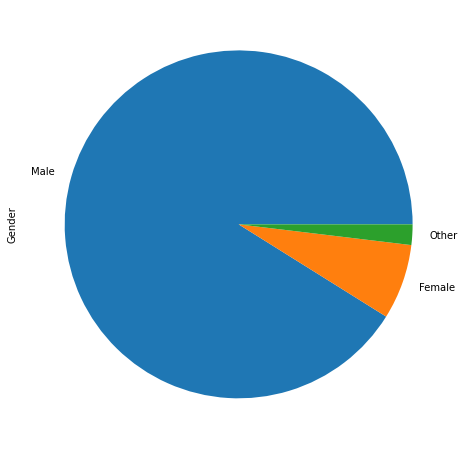

In [33]:

# disable chained assignments
pd.options.mode.chained_assignment = None # https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy
df_eval["Gender"][[element not in ["Male", "Female", np.nan] for element in df_eval["Gender"]]] = "Other"
print(df_eval["Gender"].value_counts())
df_eval["Gender"].value_counts().plot(kind="pie", figsize=(8,8));


This should be enough for a first overview.<br>
So let's take a look at question number 1: <br>
To what extent is there equal opportunity in the programming profession?

In [34]:
a = df_eval.groupby("Race").mean()

In [35]:
a.loc[ethnicity_in_focus]

,Salary,JobSatisfaction,CareerSatisfaction
Race,,,
White or of European descent,61582.525312,7.057110,7.559125
South Asian,30528.177506,6.373900,7.076246
Hispanic or Latino/Latina,41648.064699,7.248210,8.069212
East Asian,52027.612807,6.779221,7.113636
Middle Eastern,37802.317456,6.849057,7.537736
Hispanic or Latino/Latina; White or of European descent,60179.626160,7.219355,7.741935
Black or of African descent,50068.650250,6.187097,7.212903
Middle Eastern; White or of European descent,69035.926739,7.090909,7.575758


In [36]:
df_eval.groupby("Gender").mean()

,Salary,JobSatisfaction,CareerSatisfaction
Gender,,,
Female,57969.628276,6.985294,7.409314
Male,56924.546269,6.977897,7.525677
Other,61633.921918,6.576577,7.162162


In [37]:
df_eval.groupby("HighestEducationParents").mean()

,Salary,JobSatisfaction,CareerSatisfaction
HighestEducationParents,,,
A bachelor's degree,57102.290990,6.945182,7.494773
A doctoral degree,68414.472092,7.185484,7.553226
A master's degree,60409.909827,7.033951,7.522377
A professional degree,64326.306664,6.998182,7.480000
High school,50924.049281,6.899902,7.463867
I don't know/not sure,49553.558412,6.898204,7.233533
I prefer not to answer,45081.722501,6.861538,7.523077
No education,38277.773591,6.689655,7.551724
Primary/elementary school,39351.855125,6.733656,7.246973


In [38]:
df_eval.groupby("Country").mean() # ggf. um country list erweitern

,Salary,JobSatisfaction,CareerSatisfaction
Country,,,
Afghanistan,31133.691172,8.666667,7.333333
Albania,41455.722763,6.375000,6.250000
Anguilla,100000.000000,9.000000,9.000000
Argentina,25771.287719,6.551724,7.603448
Armenia,16785.714286,7.142857,7.285714
...,...,...,...
Vietnam,13183.333333,6.888889,7.444444
Virgin Islands (USA),175000.000000,10.000000,9.000000
Yemen,1000.000000,9.000000,9.000000


In [23]:
df_eval["HighestEducationParents"].value_counts()

A bachelor's degree                                    3539
A master's degree                                      2592
High school                                            2048
Some college/university study, no bachelor's degree    1613
A doctoral degree                                       620
A professional degree                                   550
Primary/elementary school                               413
I don't know/not sure                                   167
I prefer not to answer                                   65
No education                                             58
Name: HighestEducationParents, dtype: int64

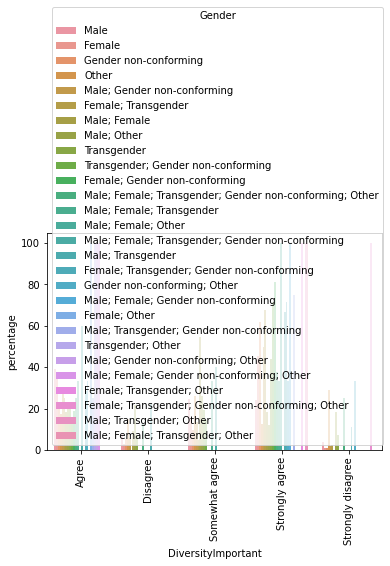

In [24]:
grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['DiversityImportant'].value_counts(normalize=True, sort=False)

Satisfaction_data = [
    {'DiversityImportant': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]

df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="DiversityImportant", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels